<a href="https://colab.research.google.com/github/prateekbps/DataScience/blob/main/Functional_API_with_Transfer_Learning_Feature_Extraction_concept.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 98% 1.04G/1.06G [00:08<00:00, 222MB/s]
100% 1.06G/1.06G [00:10<00:00, 109MB/s]


In [ ]:
import zipfile
zip_file = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_file.extractall('/content')
zip_file.close()

In [ ]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from keras.models import Sequential


In [ ]:
# Generate all the data in my system
train_ds = keras.utils.image_dataset_from_directory(directory='/content/train', labels='inferred',
                                                    label_mode='int', batch_size=32,
                                                    image_size=(227,227))

test_ds = keras.utils.image_dataset_from_directory(directormode='int', batch_size=32,
                                                    image_size=(227,227))y='/content/test', labels='inferred',
                                                    label_mode='int', batch_size=32,
                                                    image_size=(227,227))

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# Normalize the data
def process(image, label):
  image = tf.cast(image/255.0, tf.float64)
  return image, label

In [ ]:
train_ds = train_ds.map(process)
test_ds = test_ds.map(process)

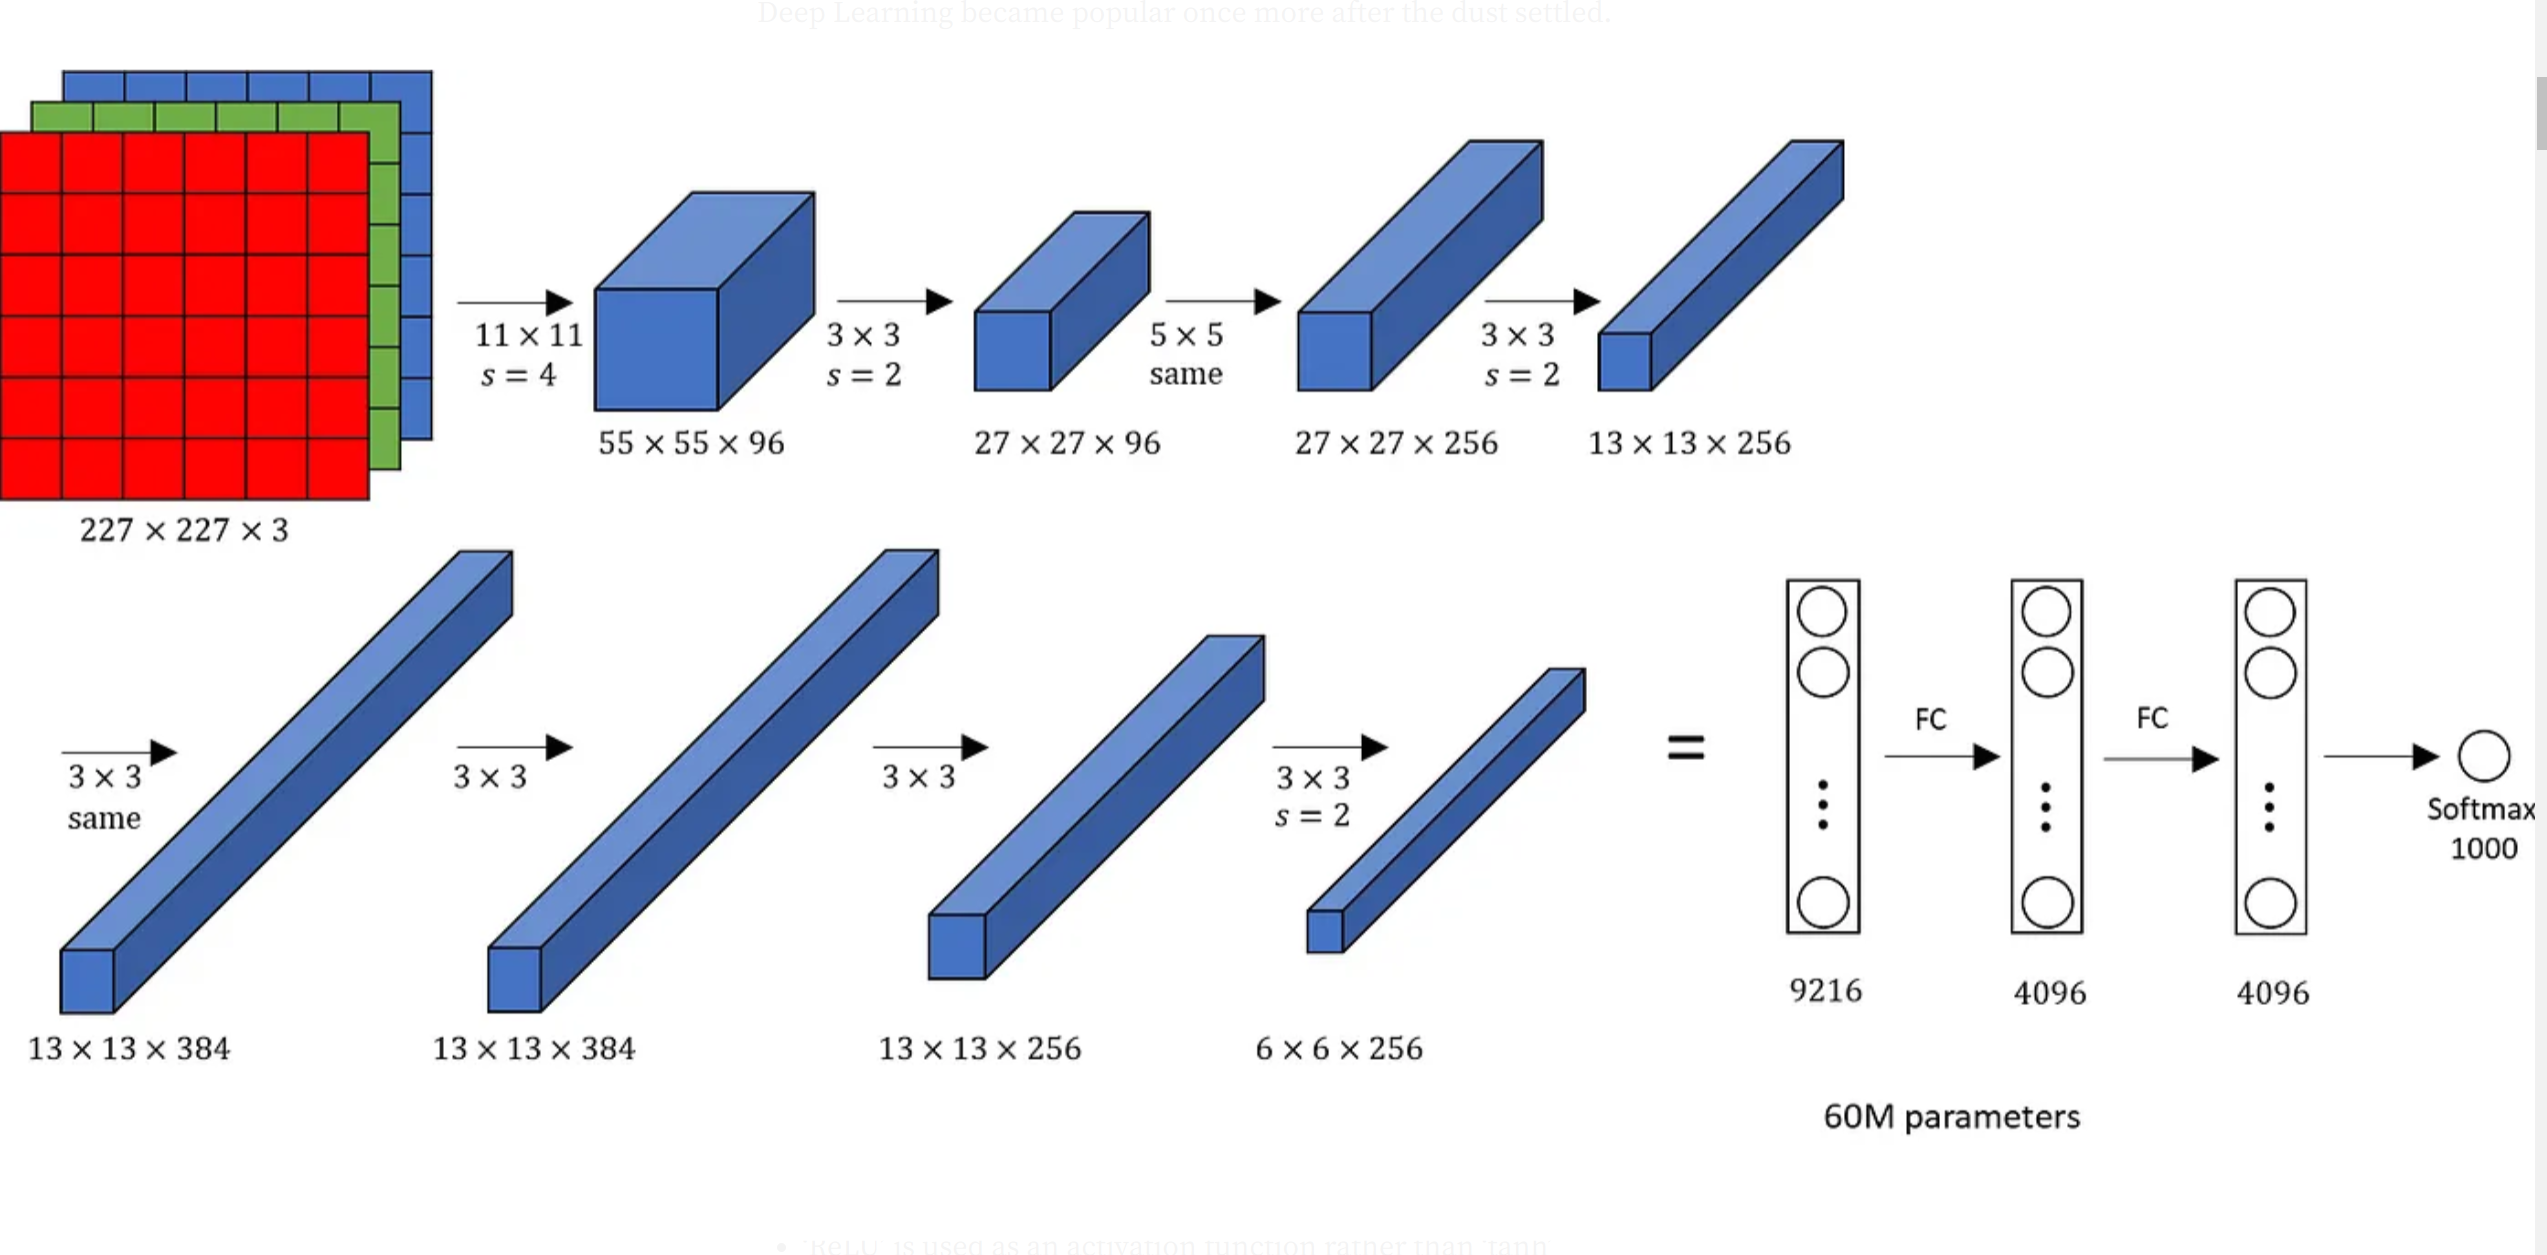

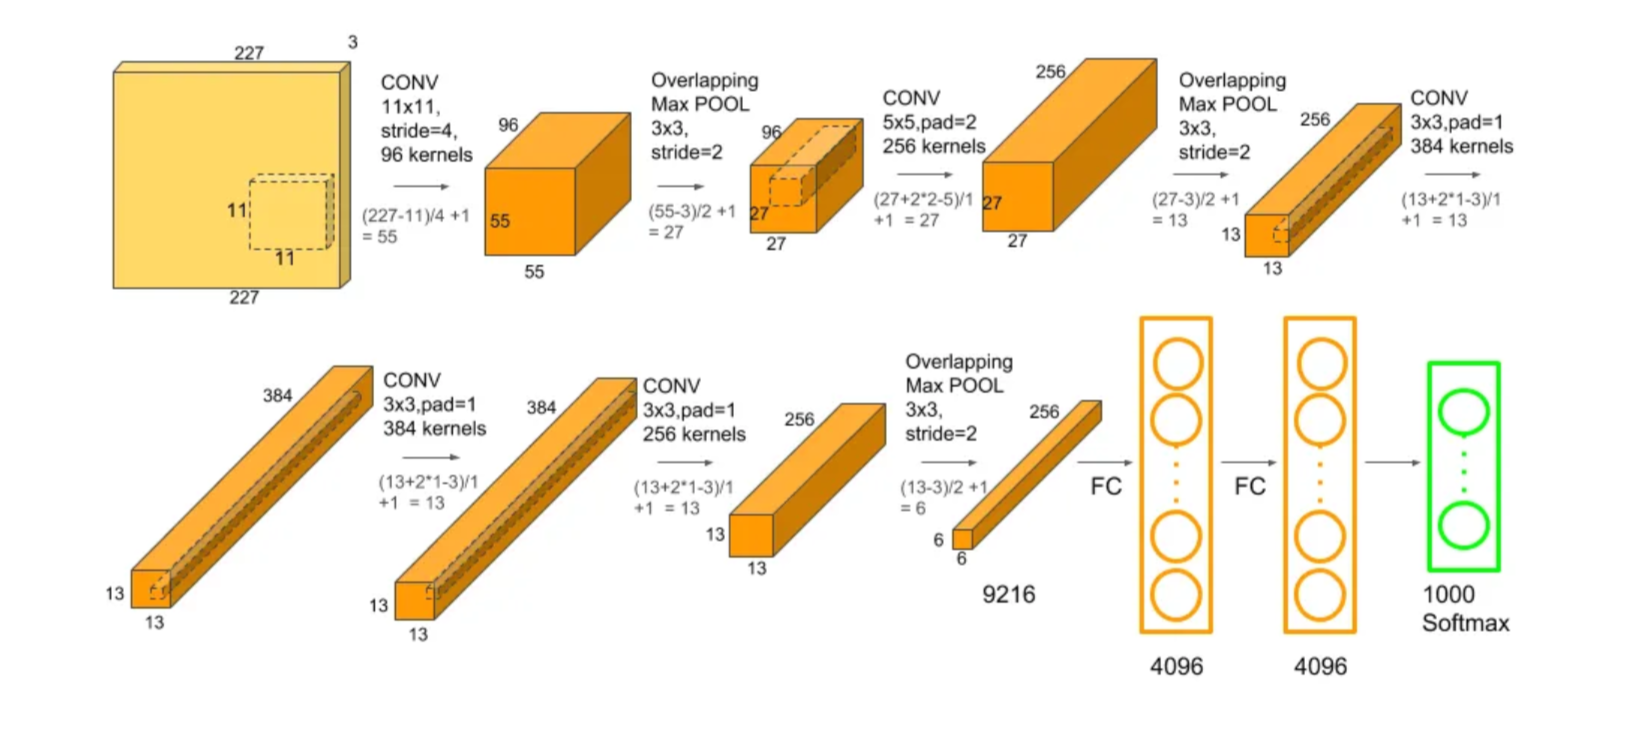

In [ ]:
11*11*3*96+96

34944

In [ ]:
5*5*96*256+256

614656

In [ ]:
3*3*256*384+384

885120

In [ ]:
# CNN Model
model = Sequential()
# Conv 1
# 11*11*3*96+96 {(filter size * chennal * filter + filter )}
model.add(Conv2D(96, kernel_size=(11,11), strides=4, activation='relu', input_shape=(227,227,3)))
# maxpooling
model.add(MaxPooling2D(pool_size=(3,3), strides=2))
# conv 2
# 5*5*96*256+256
model.add(Conv2D(256, kernel_size=(5,5), padding='same', activation='relu'))
# maxpooling
model.add(MaxPooling2D(pool_size=(3,3), strides=2))
# conv 3
model.add(Conv2D(384, kernel_size=(3,3), padding='same', activation='relu'))
# conv 4
model.add(Conv2D(384, kernel_size=(3,3),padding='same', activation='relu'))
# conv 5
model.add(Conv2D(256, kernel_size=(3,3), padding='same',activation='relu'))
# maxpooling
model.add(MaxPooling2D(pool_size=(3,3), strides=2))
# flatten
model.add(Flatten())
# DNN 1
model.add(Dense(128, activation='relu'))
# output
model.add(Dense(1, activation='sigmoid'))
# summary
model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 27, 27, 96)        0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 27, 27, 256)       614656    
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 13, 13, 256)       0         
 ng2D)                                                           
                                                                 
 conv2d_18 (Conv2D)          (None, 13, 13, 384)       885120    
                                                                 
 conv2d_19 (Conv2D)          (None, 13, 13, 384)      

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(train_ds, epochs=10, validation_data=test_ds)

Epoch 1/10
625/625 [==============================] - 70s 101ms/step - loss: 0.6980 - accuracy: 0.4985 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/10
625/625 [==============================] - 60s 95ms/step - loss: 0.6932 - accuracy: 0.4967 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/10
625/625 [==============================] - 56s 89ms/step - loss: 0.6932 - accuracy: 0.4939 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/10
625/625 [==============================] - 55s 87ms/step - loss: 0.6932 - accuracy: 0.4942 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/10
625/625 [==============================] - 56s 88ms/step - loss: 0.6932 - accuracy: 0.4932 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 6/10
625/625 [==============================] - 58s 92ms/step - loss: 0.6932 - accuracy: 0.4934 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/10
625/625 [==============================] - 72s 115ms/step - loss: 0.6932 - accuracy: 0.4949 - val_loss: 0.6932 - val_accurac

In [ ]:
# modify architecture
# CNN Model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), strides=2,padding='same', activation='relu', input_shape=(227,227,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3), strides=2))

model.add(Conv2D(32, kernel_size=(3,3), strides=2,padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3), strides=2))

# flatten
model.add(Flatten())
# DNN 1
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
# output
model.add(Dense(1, activation='sigmoid'))
# compile
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
# fit the model
history = model.fit(train_ds, epochs=5, validation_data=test_ds)


Epoch 1/5
625/625 [==============================] - 75s 111ms/step - loss: 0.5487 - accuracy: 0.7263 - val_loss: 0.6311 - val_accuracy: 0.6682
Epoch 2/5
625/625 [==============================] - 56s 90ms/step - loss: 0.4463 - accuracy: 0.7926 - val_loss: 0.5465 - val_accuracy: 0.7352
Epoch 3/5
625/625 [==============================] - 53s 84ms/step - loss: 0.4013 - accuracy: 0.8163 - val_loss: 0.4481 - val_accuracy: 0.7918
Epoch 4/5
625/625 [==============================] - 56s 90ms/step - loss: 0.3629 - accuracy: 0.8410 - val_loss: 0.4450 - val_accuracy: 0.7942
Epoch 5/5
625/625 [==============================] - 53s 85ms/step - loss: 0.3283 - accuracy: 0.8581 - val_loss: 0.4568 - val_accuracy: 0.8014


In [ ]:
# https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection?select=yes

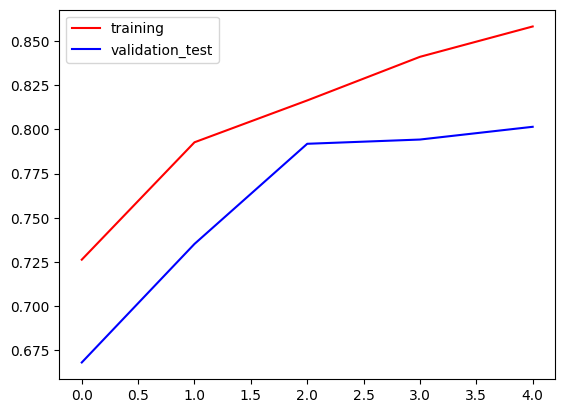

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color='red', label='training')
plt.plot(history.history['val_accuracy'], color='blue', label='validation_test')
plt.legend()
plt.show()

In [ ]:
!pip install opencv-python

In [ ]:
import cv2
import numpy as np

In [ ]:
cat_image= cv2.imread('/content/cat1.jpeg')
dog_image = cv2.imread('/content/dog.jpeg')

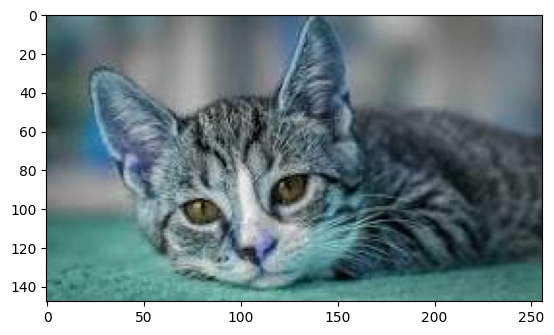

In [ ]:
plt.imshow(cat_image)

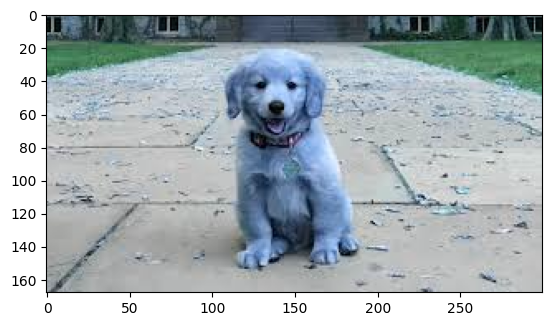

In [ ]:
plt.imshow(dog_image)

In [ ]:
cat_image.shape

(148, 256, 3)

In [ ]:
cat = cv2.resize(cat_image, (227,227))

In [ ]:
cat.shape

(227, 227, 3)

In [ ]:
cat_input = cat.reshape((1,227,227,3))

In [ ]:
cat_input.shape

(1, 227, 227, 3)

In [ ]:
model.predict(cat_input)

1/1 [==============================] - 0s 35ms/step


array([[1.]], dtype=float32)

In [ ]:
 test_image2.shape

(168, 300, 3)

In [ ]:
test2 = cv2.resize(test_image2, (227,227))

In [ ]:
test2.shape

(227, 227, 3)

In [ ]:
test_input1 = test2.reshape((1,227,227,3))

In [ ]:
test_input1.shape

(1, 227, 227, 3)

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 19ms/step


array([[1.]], dtype=float32)

In [ ]:
model.predict(test_input1)

1/1 [==============================] - 0s 17ms/step


array([[1.]], dtype=float32)

# https://www.kaggle.com/datasets/jangedoo/utkface-new

# Functional API

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
# !kaggle datasets download -d jangedoo/utkface-new

Dataset URL: https://www.kaggle.com/datasets/jangedoo/utkface-new
License(s): copyright-authors
 99% 327M/331M [00:08<00:00, 43.9MB/s]
100% 331M/331M [00:08<00:00, 41.0MB/s]


In [3]:
import zipfile
zip_file = zipfile.ZipFile('/content/utkface-new.zip')
zip_file.extractall('/content')
zip_file.close()

In [6]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras.models import Model
from keras.src.legacy.preprocessing.image import ImageDataGenerator

# from keras.preprocessing.image import ImageDataGenerator

In [7]:
folder_path = '/content/utkface_aligned_cropped/UTKFace'

In [ ]:
# Task :
# predict : age, gender and ethenicity
# age - regression problem
# gender  - binary classificiation
# ethenicity - multiclass classification problem

In [8]:
age = []
gender = []
ethenicity = [] # You have to try this
img_path = []

for file in os.listdir(folder_path):
  age.append(int(file.split('_')[0]))
  gender.append(int(file.split('_')[1]))
  img_path.append(file)


In [9]:
len(age)

23708

In [10]:
len(gender)

23708

In [11]:
len(img_path)

23708

In [12]:
df = pd.DataFrame({'age':age, 'gender':gender, 'img_path':img_path})
df

,age,gender,img_path
0,36,0,36_0_2_20170105163358596.jpg.chip.jpg
1,1,0,1_0_4_20161221202331737.jpg.chip.jpg
2,1,1,1_1_3_20161219230723008.jpg.chip.jpg
3,22,1,22_1_0_20170103180211110.jpg.chip.jpg
4,24,1,24_1_3_20170104222408639.jpg.chip.jpg
...,...,...,...
23703,34,1,34_1_4_20170103230444089.jpg.chip.jpg
23704,22,1,22_1_3_20170104223125535.jpg.chip.jpg
23705,26,1,26_1_1_20170116223404554.jpg.chip.jpg
23706,26,1,26_1_3_20170117154940189.jpg.chip.jpg


In [13]:
df['gender'].value_counts()

,count
gender,
0,12391
1,11317


In [14]:
# split the data into training and validation
train_df = df.sample(frac=1, random_state=0).iloc[:20000]
test_df = df.sample(frac=1, random_state=0).iloc[20000:]

In [15]:
"""
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:20000,:], df.iloc[20000:, :])
"""

'\nfrom sklearn.model_selection import train_test_split\nx_train, x_test, y_train, y_test = train_test_split(df.iloc[:20000,:], df.iloc[20000:, :])\n'

In [16]:
train_df.shape

(20000, 3)

In [17]:
test_df.shape

(3708, 3)

In [18]:
# Data Augmentation
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=25, width_shift_range=0.2, height_shift_range=0.3,
                                   zoom_range=0.3,horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255, rotation_range=25, width_shift_range=0.2, height_shift_range=0.3,
                                   zoom_range=0.3,horizontal_flip=True)

In [19]:
# apply data augmentation method to my original dataset
train_generator = train_datagen.flow_from_dataframe(train_df, directory=folder_path, x_col= 'img_path',
                                                    y_col=['age','gender'], target_size=(256,256),
                                                    class_mode ='multi_output')

test_generator = test_datagen.flow_from_dataframe(test_df, directory=folder_path, x_col= 'img_path',
                                                    y_col=['age','gender'], target_size=(256,256),
                                                    class_mode ='multi_output')

Found 20000 validated image filenames.
Found 3708 validated image filenames.


# Functional API Model - Transfer Learning Model
# ResNet Model - Google
# VGG16
# Inception model

In [20]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import *
from keras.models import Model # Functional api
from keras.applications.resnet50 import ResNet50

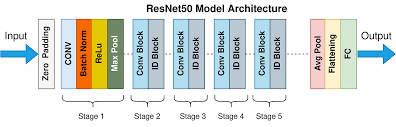

# Transfer Learning Approach - Feature Extraction method (CNN layer not changable : resnet.trainable = False and include_top=False)

In [21]:
resnet = ResNet50(include_top=False, weights="imagenet", input_shape=(256,256,3))
resnet.trainable = False # utilizing pretrained weights while changing nothing

output = resnet.layers[-1].output
flatten = Flatten()(output)

dense1 = Dense(128, activation='relu')(flatten)
dense2 = Dense(128, activation='relu')(flatten)

hidden1 = Dense(64, activation='relu')(dense1)
hidden2 = Dense(64, activation='relu')(dense2)

output1 = Dense(1, activation='linear', name='age')(hidden1)
output2  = Dense(1, activation='sigmoid', name='gender')(hidden2)

# Functional API
model = Model(inputs=resnet.input, outputs=[output1, output2])
model.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 256, 256, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 262, 262, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 128, 128, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 128, 128, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 128, 128, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 130, 130, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 64, 64, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 64, 64, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 64, 64, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 64, 64, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 64, 64, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 64, 64, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 64, 64, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 64, 64, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 64, 64, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 57,159,042 (218.04 MB)

 Trainable params: 33,571,330 (128.06 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

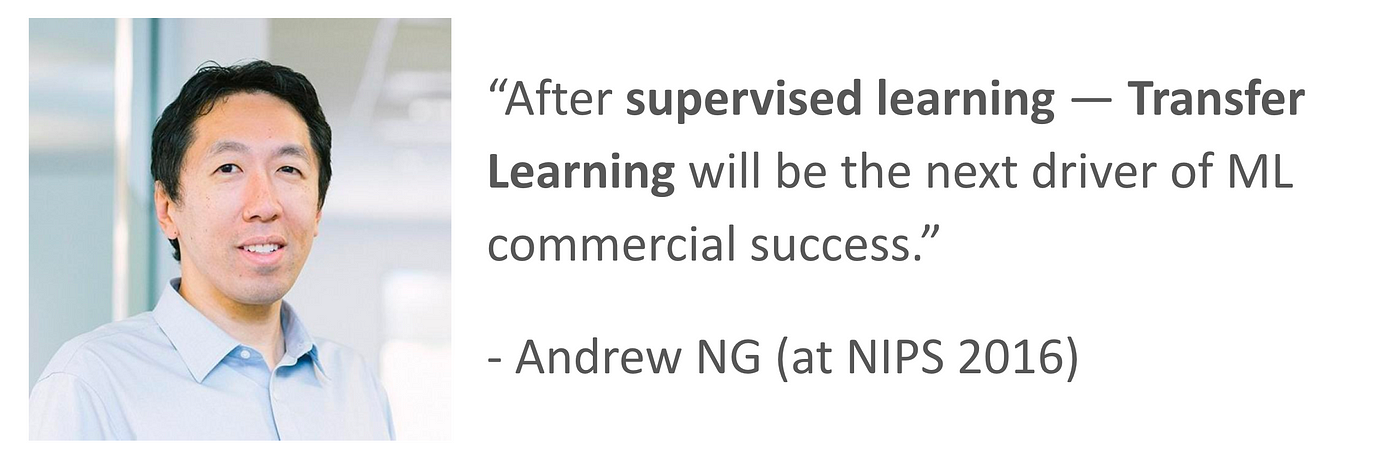

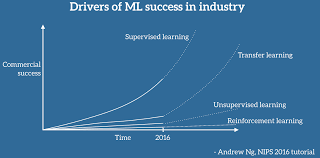

In [22]:
model.compile(optimizer='adam', loss={'age':'mae', 'gender':'binary_crossentropy'},
              metrics={'age':'mae', 'gender':'accuracy'})

In [24]:
history = model.fit(train_generator, batch_size=128, epochs=5, validation_data=test_generator)

TypeError: `output_signature` must contain objects that are subclass of `tf.TypeSpec` but found <class 'list'> which is not.